#esame terza parte

usando il fit analitico nfw per stimare per ogni bin di ricchezza la massa (log_10(M)) e la concentrazione media c. A tal scopo si assume una likelihood Gaussiana utilizzando le matrici di covarianza fornite per ogni intervallo di ricchezza, e i prior uniformi forniti per i parametri; per ogni bin di ricchezza si utilizza il relativo redshift medio. Usare il sofware emcee per derivare i posteriors sui parametri.

In [2]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import emcee
from scipy.stats import norm
from scipy import stats
from scipy.optimize import minimize
import math

/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[13.00000595  0.99044632]


  0%|                                                  | 0/5000 [00:00<?, ?it/s]/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████████| 5000/5000 [00:14<00:00, 353.67it/s]
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [44.83883667 42.82829547]
(150400, 2)
[13.02383589  0.79113998]


100%|██████████████████████████████████████| 5000/5000 [00:14<00:00, 357.00it/s]
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [38.39861923 34.32215001]
(150400, 2)
[13.01312564  1.0938863 ]


100%|██████████████████████████████████████| 5000/5000 [00:14<00:00, 354.91it/s]
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [37.38640744 37.01663261]
(150400, 2)
[13.03408431  1.69775811]


100%|██████████████████████████████████████| 5000/5000 [00:14<00:00, 356.52it/s]
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [41.18735561 41.15441332]
(150400, 2)
[13.00103452  1.10554056]


  0%|                                                  | 0/5000 [00:00<?, ?it/s]/Users/alviseperosa/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████████| 5000/5000 [00:13<00:00, 360.94it/s]


autocorr_time: [38.65533717 34.97470811]
(150400, 2)


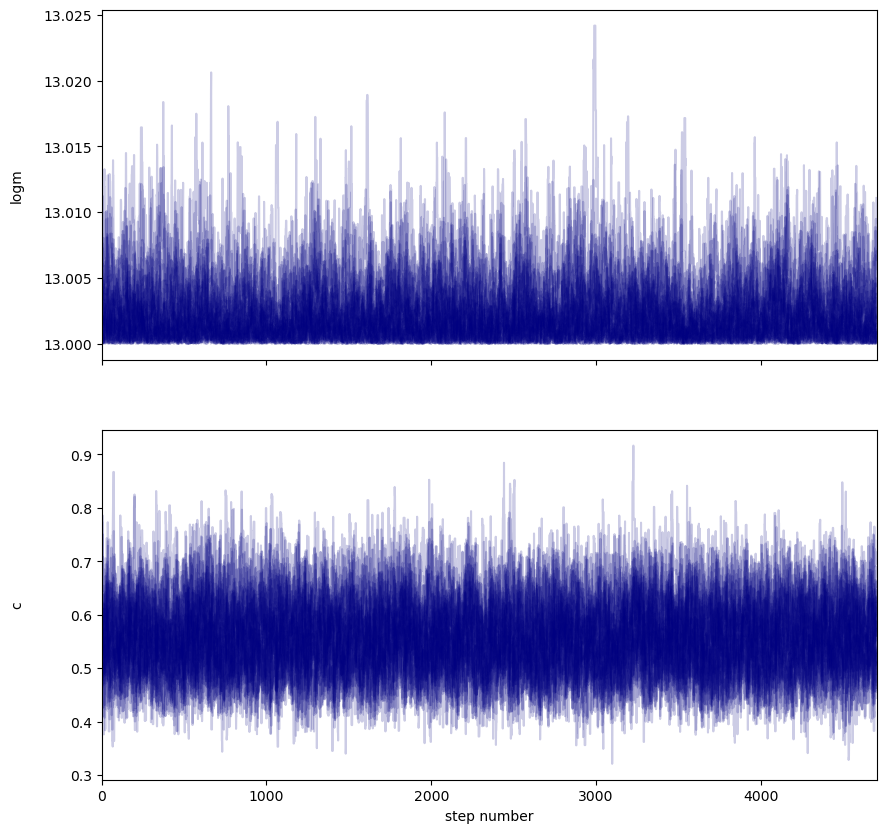

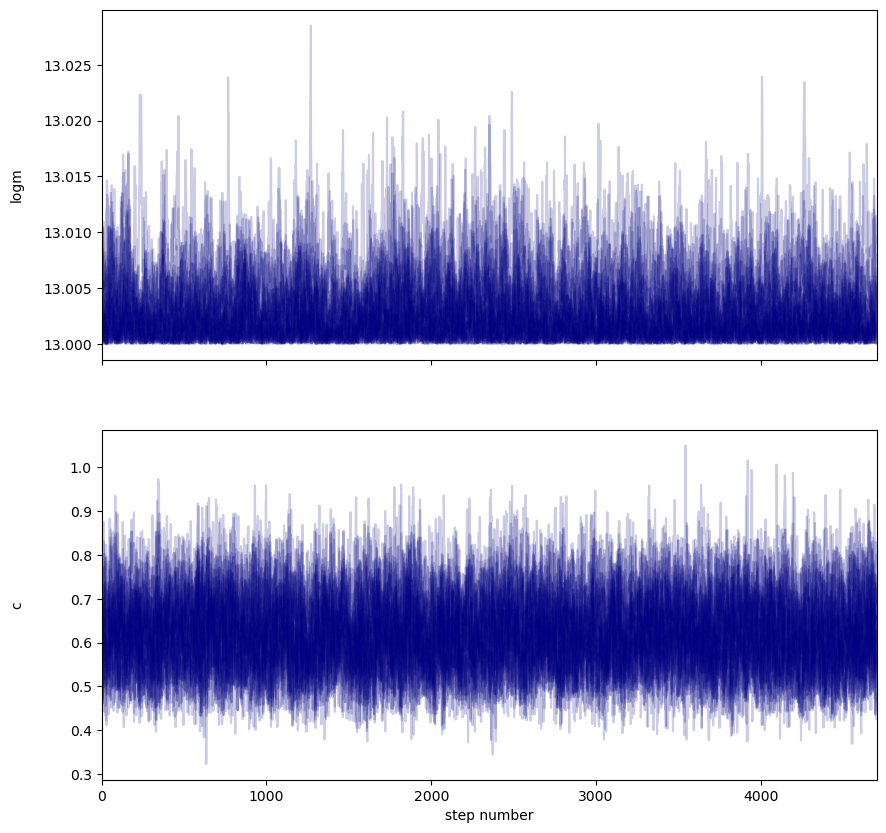

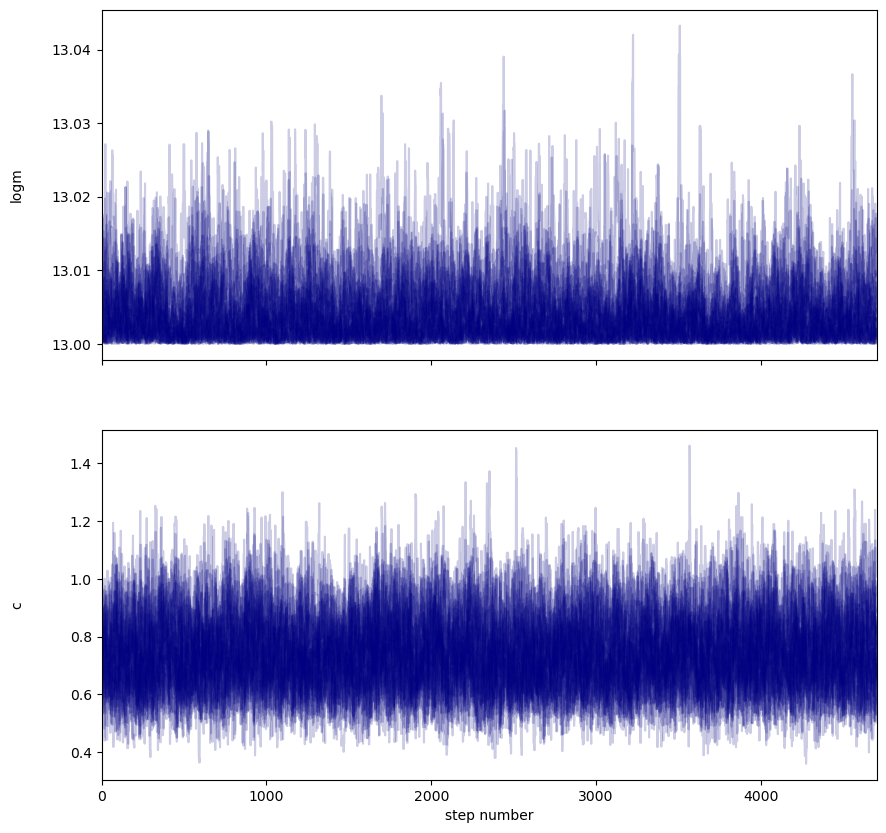

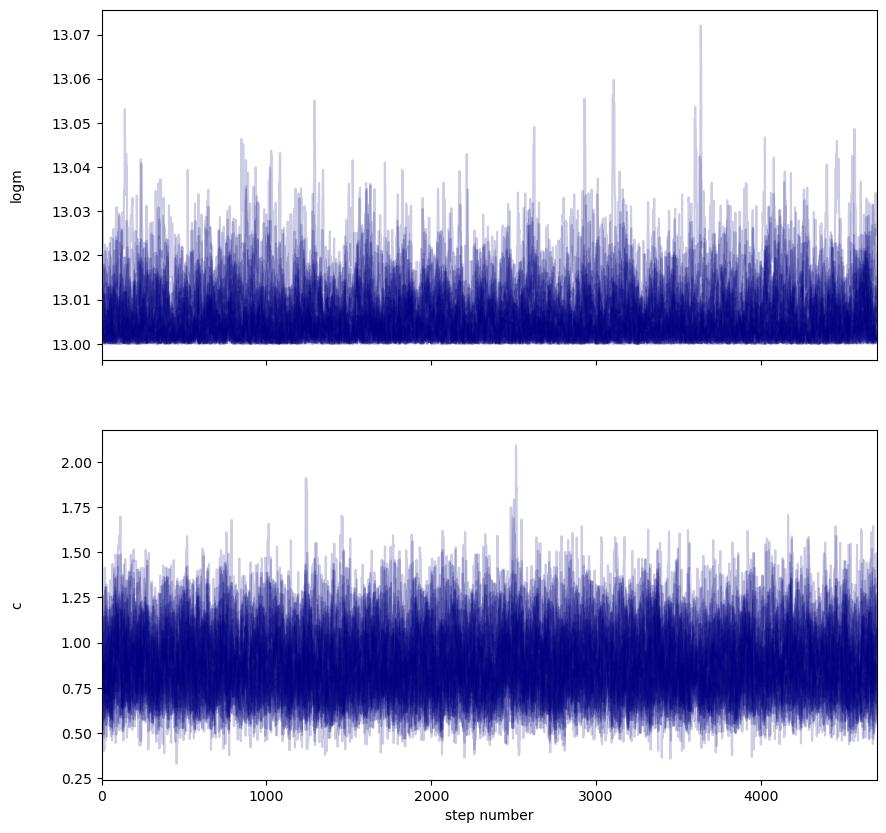

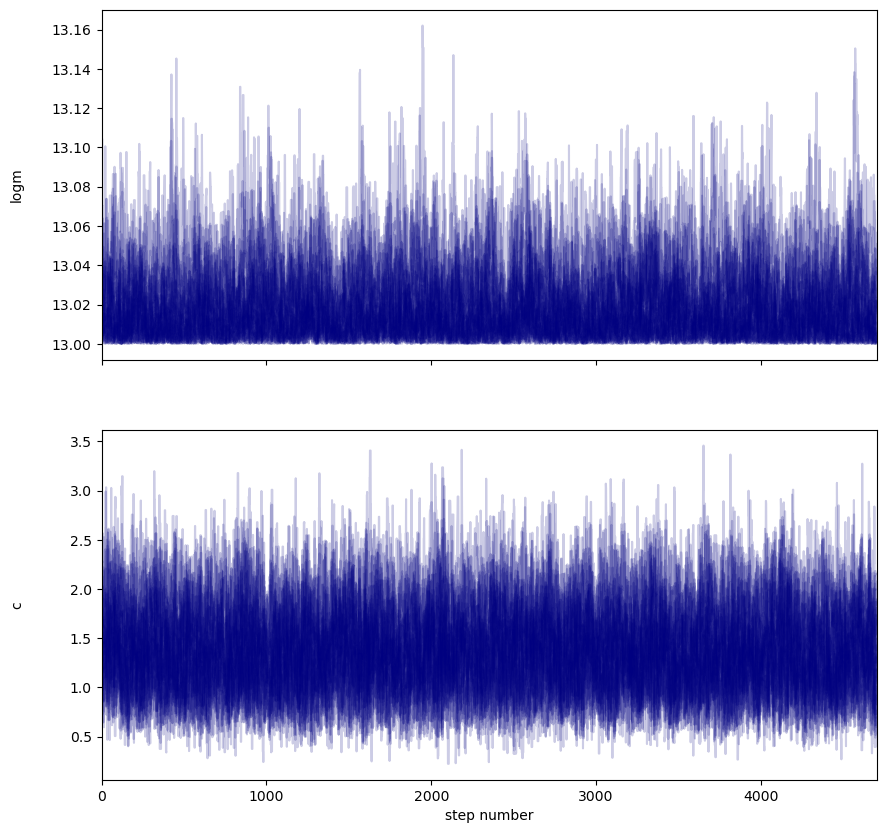

In [44]:
from astropy.table import Table
def nfw(R, M, c, z):
    # Definisco i valori che mi serviranno poi per la funzione sigma
    
    ro_m = 0.286 * (2.7751428946 * 10**11) * 0.7**2
    f_c = math.log(1 + c) - (c / (1 + c))
    delta_c= 200 * c**3 / (3 * f_c)
    ro_s = ro_m * delta_c * (1 + z)**3
    r_s =  1 / c *((3 * M / (4 * np.pi * ro_m* ((1 + z)**3))) ** (1 / 3))
    
    # Calcolo della funzione f(x) 
    x = R / r_s
    f_x = np.zeros_like(x)
    
    # faccio un ciclo for che itera su una sequenza di numeri interi, 
    #partendo da 0 fino a un numero pari alla lunghezza della lista x. In questo caso, x è 
    #un array numpy, e len(x) restituisce la lunghezza di tale array.
    
    for i in range (len(x)):
      if(x[i]<=1):
        f_x[i]=(1-(2*np.arctanh(math.sqrt((1-x[i])/(1+x[i]))))/(math.sqrt(1-x[i]**2)))/(x**2-1)[i]
      elif(x[i]==1):
        f_x[i]=1/3
      else:
        f_x[i]=(1-(2*np.arctan(math.sqrt((x[i]-1)/(1+x[i]))))/(math.sqrt(x[i]**2-1)))/(x**2-1)[i]

    # infine mettendo tutte le variabili assieme e ottengo la fuznione sigma 
    Sigma = 2 * f_x * r_s * ro_s

    return Sigma




# Ora definiamo la funzione di Likelihood del modello
# Il profilo di densità viene calcolato con la NFW definita sopra
def log_likelihood(theta, r, data, cov_matrix, z):
    logM, c = theta
    M = 10**(logM)
    model = nfw(r, M, c, z)
    diff = data - model
    cov_inv = np.linalg.inv(cov_matrix)
    return -0.5 * np.dot(diff, np.dot(cov_inv, diff))

# Definiamo la log-prior: implementa un prior piatto (uniforme) sui parametri da stimare logM e c.
# Restituisce 0 se i parametri sono nel range definito e -np.inf altrimenti.
def log_prior(theta):
    logM, c = theta
    if 13.0 <= logM <= 16.0 and 0.2 <= c <= 20.0: #io per logm per farlo venire bene metterei un intervallo tra 10 e 16 ma nella consegna chiede 13
        return 0.0
    return -np.inf

# Ora definiamo la log-posterior: è la somma del log-prior e del log-likelihood.
# Se il log-prior è infinito, la log-posterior diventa infinitamente negativa.
def log_posterior(theta, r, data, cov_matrix, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, r, data, cov_matrix, z)

results = np.ndarray((5,150400,2))
bestfit=[]
# Carichiamo i dati richiesti
tab = 'halo_catalog.fit'
catalog_data = fits.getdata(tab)
ricchezza = catalog_data['LAMBDA_TR']
profilo_densita = catalog_data['SIGMA_of_R']
R_values = np.load('R_values.npy')
cov_matrix = np.load('covariance_matrices.npy')


intervalli = np.array([15, 20, 30, 45, 60, 200])
# Inizializziamo degli array per mettere i risultati ad ogni gruppo
results = np.ndarray((5,150400,2)) 
bestfit = np.ndarray ((5,2))
   #bestfit = np.ndarray ((5,2)) # due parametri stimati per ogni gruppo di ricchezza

# Suddividiamo il catalogo in base agli intervalli, come prima
for i in range(5):
    if i < 4:
        gruppo = catalog_data[(ricchezza >= intervalli[i]) & (ricchezza < intervalli[i + 1])]
    else:
        gruppo = catalog_data[(ricchezza >= intervalli[i])]
    redshift_medio = np.mean(gruppo['Z'])
    profili_densita_gruppo = gruppo['SIGMA_of_R']

 
    sigma_medio = np.mean(profili_densita_gruppo, axis=0)
    deviazione_standard = np.std(profili_densita_gruppo, axis=0)

    #print(sigma_medio)
    
    nll = lambda *args: -log_posterior(*args)

#Parametri iniziali
    initial = np.array([13.5, 0.5]) * (1 + 0.01 * np.random.randn(2))
#Minimizzazione per il singolo gruppo perche ho messo il meno prima
    soln = minimize(nll, initial, args=(R_values, sigma_medio, cov_matrix[i], redshift_medio))
    logM_b, c_b = soln.x
    bestfit[i] = soln.x
    print(soln.x) #cosi vedo se stampa 5 vaplte 2 valori che minimizzano
    
#Moltiplica il vettore dei parametri ottimizzati per un valore,
#Questo introduce una piccola variazione ai parametri ottimizzati
    pos = soln.x *(1+ 1e-4 * np.random.randn(32, 2)) 

#print(pos.shape )                                  
    nwalkers, ndim = pos.shape 
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(R_values, sigma_medio, cov_matrix[i], redshift_medio))
    sampler.run_mcmc(pos, 5000, progress=True);
    
    
    # Ora troviamo il tempo di autocorrelazione
    # Mi serve per capire quanti passaggi effettuare per ottenere una catena relativamente indipendente.
    tau = sampler.get_autocorr_time()
    print("autocorr_time:", tau)
    
    
    flat_samples = sampler.get_chain(discard=300, flat=True)
    print(flat_samples.shape)
    results[i] = flat_samples #è utile per salvare i campioni estratti dalla catena MCMC per il gruppo corrente
    #print(results[i])
    
    
    fig, axes = plt.subplots(2, figsize=(10, 10), sharex=True)
    samples = sampler.get_chain()
    labels = ["logm", "c"]
    burn_in = 300  # Numero di passi di burn-in da scartare

    for j in range(ndim): # itera attraverso i due parametri
        ax = axes[j] # assegna il subplot corrente alla variabile ax
        ax.plot(samples[burn_in:, :, j], "navy", alpha=0.2)  # Ignora i primi 300 passi
        ax.set_xlim(0, len(samples) - burn_in)  # Aggiorna i limiti dell'asse x
        ax.set_ylabel(labels[j])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        axes[-1].set_xlabel("step number")
   
    
plt.show()
       
    

Questi plot mostrano ad ogni step della catena di Markov le posizioni assunte dai walkers nello spazio dei parametri. 
Per il parametro 'c' si osserva che le catene oscillano tutte attorno ad un certo valore che sarà il valore più probabile del parametro,in corrispondenza del quale troveremo il picco della Posterior distribution.
Per il parametro logM invece si osserva che le catene sono bloccate al di sopra del parametro =13 (come impostato nella prior), questo non permette di osservare dove i walker passano piu tempo.
Se si ipotizzasse invece il prior uniforme per il parametro logM ∈ [10,16] si otterrebbe un plot in cui è possibile osservare chiaramente quale è il valore più probabile del parametro.
infine è possibile osservare che il tempo di autocorrelazione piccolo rispetto al numero di passi,il che indica una buona convergenza.

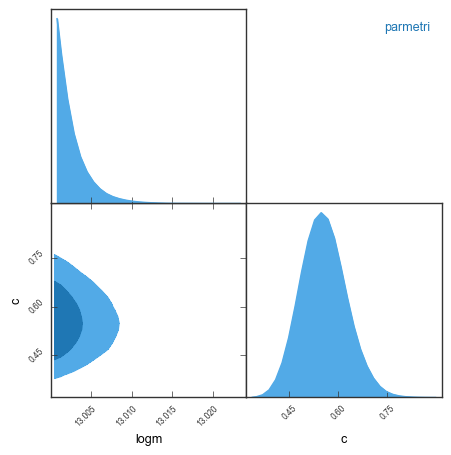

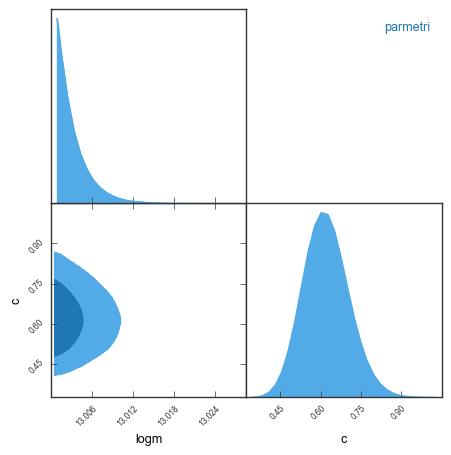

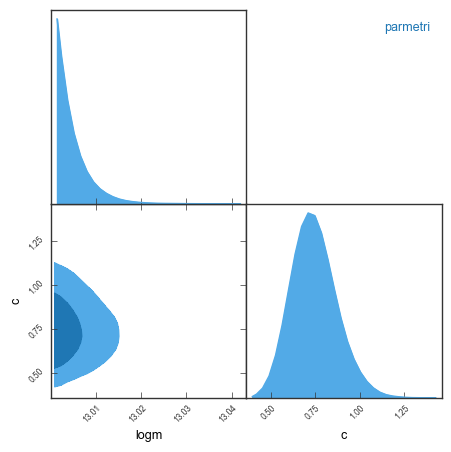

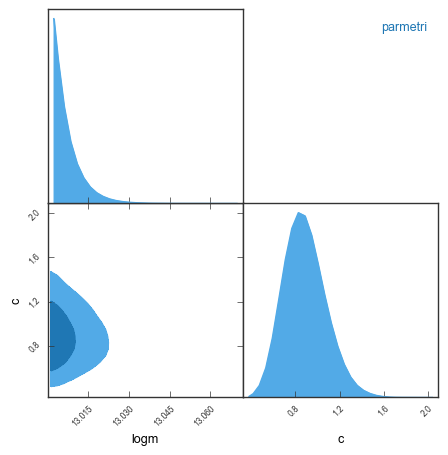

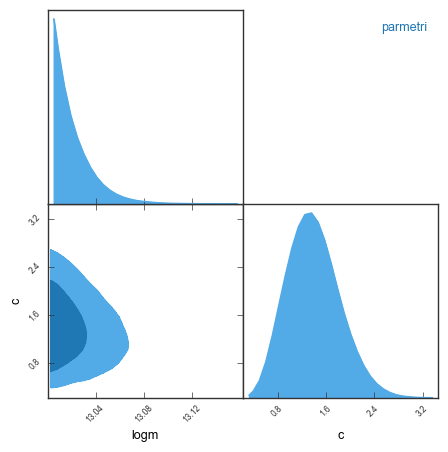

In [45]:
!pip install pygtc
import pygtc

for i in range(5):
    
    GTC = pygtc.plotGTC(chains=results[i],
                    paramNames=['logm','c'],
                    chainLabels=['parmetri'],
                    figureSize='MNRAS_page')
   

I grafici triangolari stampati in questa parte sono uno strumento molto utile per visualizzare le correlazioni tra i parametri, ottenuti da un campionamento di tipo Markov Chain Monte Carlo (MCMC). Questi grafici forniscono anche una chiara rappresentazione visiva delle distribuzioni dei suddetti parametri e delle loro relazioni.
dalle celle sulla diagonale si ottengono informazioni riguardo agli stessi parametri e alla bontà della loro stima: l'altezza del picco determina la probabilità associata alla stima, mentre la larghezza della distribuzione fornisce informazioni sull'incertezza del parametro.
Nella cella nell'angolo si osserva una rappresentazione della distribuzione congiunta dei due parametri specifici mostrati nel plot. L'obiettivo principale di questa cella è fornire informazioni sulla correlazione e la densità di probabilità congiunta tra i due parametri considerati. In altre parole, mostra quanto spesso la catena di Markov Monte Carlo (MCMC) abbia visitato determinate combinazioni di valori dei due parametri durante il campionamento.
Come già osservato in precedenza, si vede che il grafico in alto a sinistra risulta tagliato: questo succede perché il valore in cui i walkers passano una significativa quantità di tempo è sotto il valore minimo dell'intervallo definito nella prior.


Riportare il valore di best-fit, il valor medio ed errore associato ad ogni parmetro; fare
un grafico triangolare per ogni intervallo di ricchezza per mostrare i
ottenuti sui due parametri.

In [47]:
!pip install corner
import corner 

for i in range(5):
    
    mean_params = np.mean(results[i], axis=0)
    std_params = np.std(results[i], axis=0)
    print("Intervallo di ricchezza:", intervalli[i], "-", intervalli[i+1])
    print("medie:", mean_params)
    print("errore:", std_params)
    print("best fit MCMC:", bestfit[i])
    print()  # Aggiunge una riga vuota per separare i risultati degli intervalli

Intervallo di ricchezza: 15 - 20
medie: [13.00205903  0.55657817]
errore: [0.00207217 0.0664862 ]
best fit MCMC: [13.00000595  0.99044632]

Intervallo di ricchezza: 20 - 30
medie: [13.00248895  0.6198757 ]
errore: [0.00246476 0.0811134 ]
best fit MCMC: [13.02383589  0.79113998]

Intervallo di ricchezza: 30 - 45
medie: [13.00370972  0.74187972]
errore: [0.00374086 0.12366175]
best fit MCMC: [13.01312564  1.0938863 ]

Intervallo di ricchezza: 45 - 60
medie: [13.00542489  0.88567034]
errore: [0.00547193 0.18138725]
best fit MCMC: [13.03408431  1.69775811]

Intervallo di ricchezza: 60 - 200
medie: [13.01733077  1.38680411]
errore: [0.01651414 0.42370351]
best fit MCMC: [13.00103452  1.10554056]



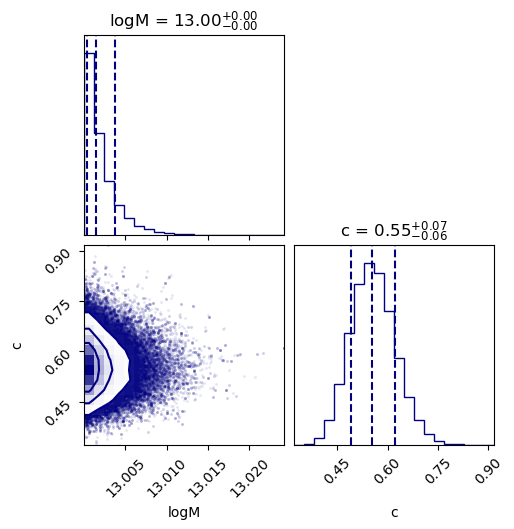

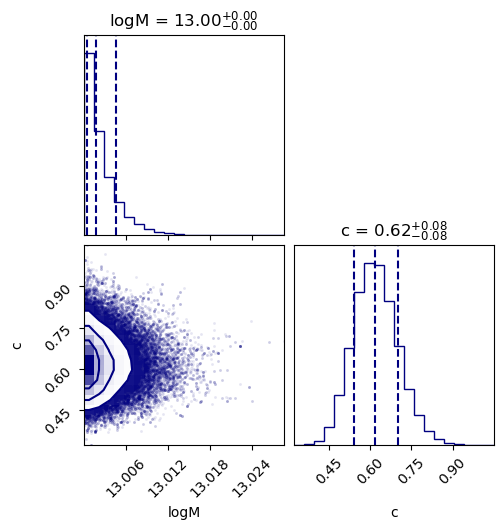

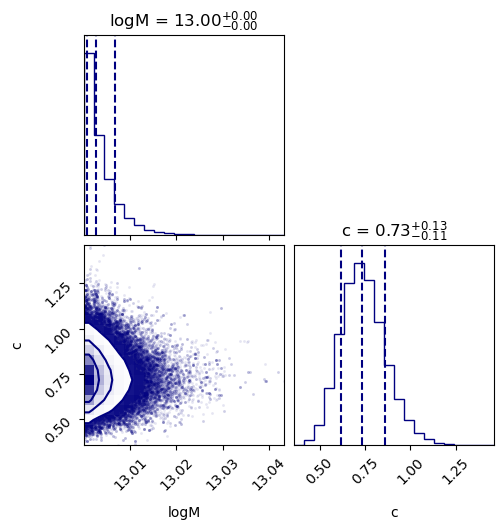

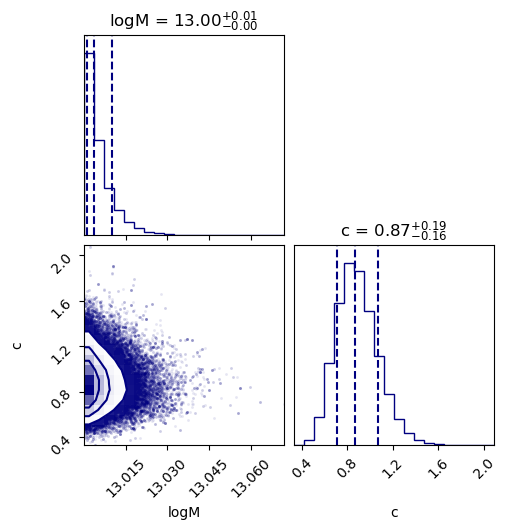

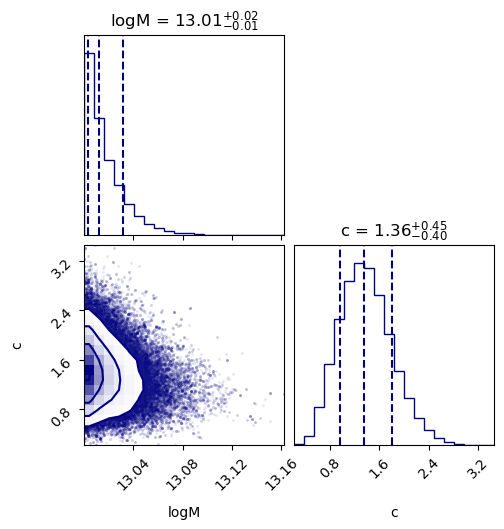

In [48]:
#Per ogni intervallo, genera il grafico triangolare sta volta con la libreria corner 
#equivalente a quello di prima
for i in range(5):
    # Estrai i campioni MCMC per il gruppo corrente
    flat_samples = results[i]
    
    # Esegui la visualizzazione con corner
    fig = corner.corner(flat_samples, labels=["logM", "c"], quantiles=[0.16, 0.5, 0.84],color='navy', show_titles=True)
    plt.show()
    
    

Verificare la bonta' del fit calcolando il chi quadro per i best fit
parameters, e confrontando i dati con ~100 valori di M e c estratti dalle catene;
commentare i risultati.

In [49]:


predictions_per_interval = []

#faccio copia incolla della altra parte dell esame che avevo gia scritto


tabella = Table.read('halo_catalog.fit')
dati_divisi = []
redshift_medi = []
sigma_medi = []
deviazione_standard = []
sigma_var=[]
# Dividi i dati in base agli intervalli di LAMBDA_TR
for i in range(len(intervalli) - 1):
    lower_bound = intervalli[i]
    upper_bound = intervalli[i + 1]
    
    # Seleziona i dati all'interno dell'intervallo corrente
    dati_intervallo = tabella[(tabella['LAMBDA_TR'] >= lower_bound) & (tabella['LAMBDA_TR'] < upper_bound)]
    redshift_medio = dati_intervallo['Z'].mean()
    redshift_medi.append(redshift_medio)
    colonne_sigma = np.vstack(dati_intervallo['SIGMA_of_R'])
    valori_medisigma = np.mean(colonne_sigma, axis=0)
    sigma_medi.append(valori_medisigma)
    valori_std = np.std(colonne_sigma, axis=0)
    sigma_var.append(valori_std)
   
    
    #print ("Valori medi di densitaà:",valori_medisigma)
    #print ("valori delle deviazioni standard:",valori_std)
    print("\n")
 
    logM_best_fit, c_best_fit = bestfit[i]
    predictions = nfw(R_values, 10**logM_best_fit, c_best_fit, redshift_medio)
    predictions_per_interval.append(predictions)
    #print(predictions)
    
    def chi_squared(observed, expected, cov_matrix):
        residuals = observed - expected
        inv_cov_matrix = np.linalg.inv(cov_matrix) # Calcolo inversa della matrice di covarianza
        chi_sq = np.dot(residuals, np.dot(inv_cov_matrix, residuals))
        return chi_sq
    
    chi2 = chi_squared(predictions, valori_medisigma, cov_matrix[i])
    
    

    print (chi2)
    



328.5039713435035


268.1842661559017


153.55806178096452


111.7620278487819


17.560731977869267


Il chi quadrato è una misura statistica utilizzata per valutare quanto bene un insieme di
osservazioni sperimentali si adatti a un modello teorico o aspettato.
Valori bassi mi garantiscono la validità dei modelli utilizzato ed in questo caso risultano
essere valori abbastanza superiori a quello che ci si aspetterebbe.
Per testare il modello ho provato a cambiare l'intervallo definito nella prior per il
parametro logM mettendo 10 al posto di 13, in quel caso i valori risuotano essere

0.57077339...

0.45739628...

0.27184688...

0.18198758...

0.06821455...

che risultano essere complessivamente accetabili.



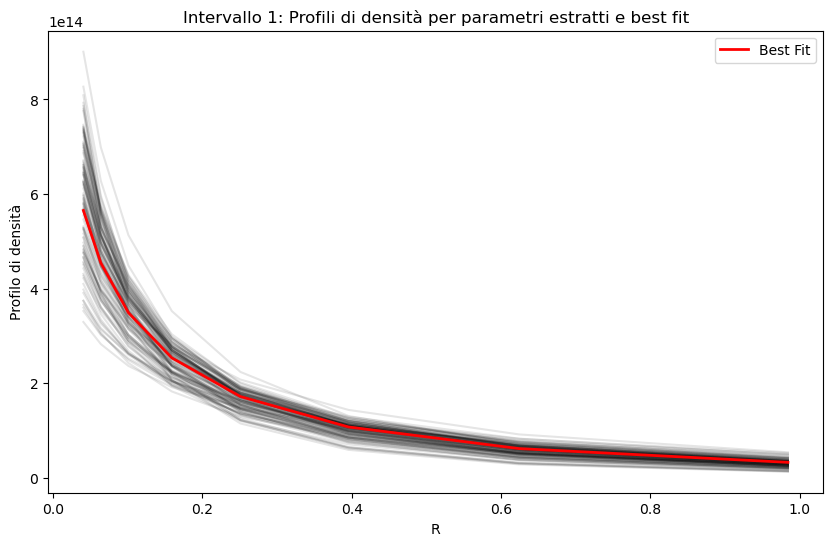

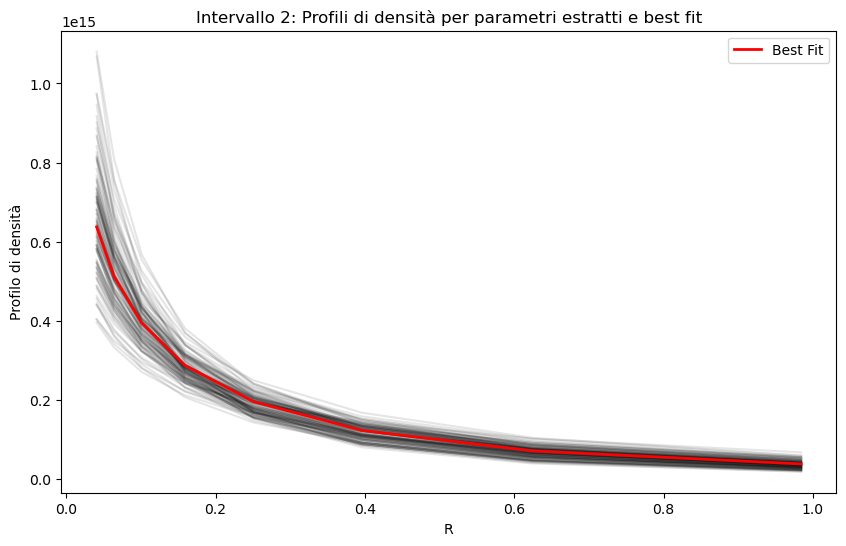

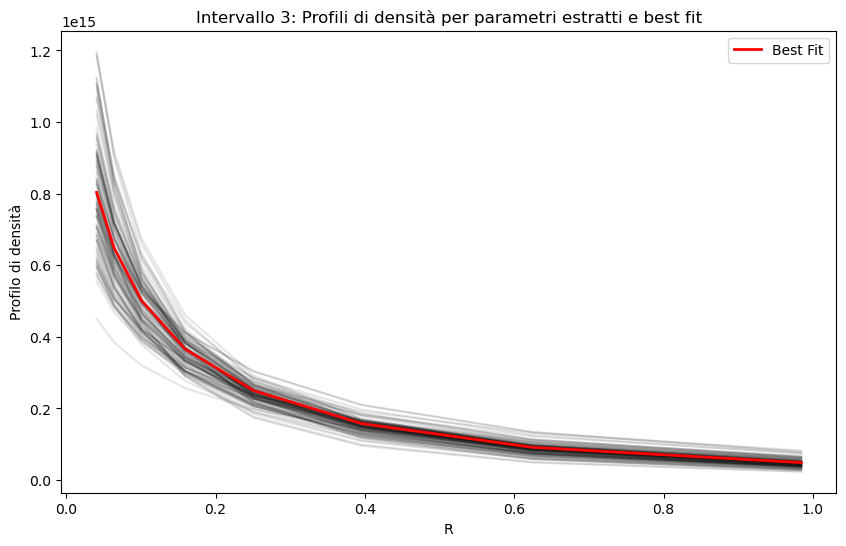

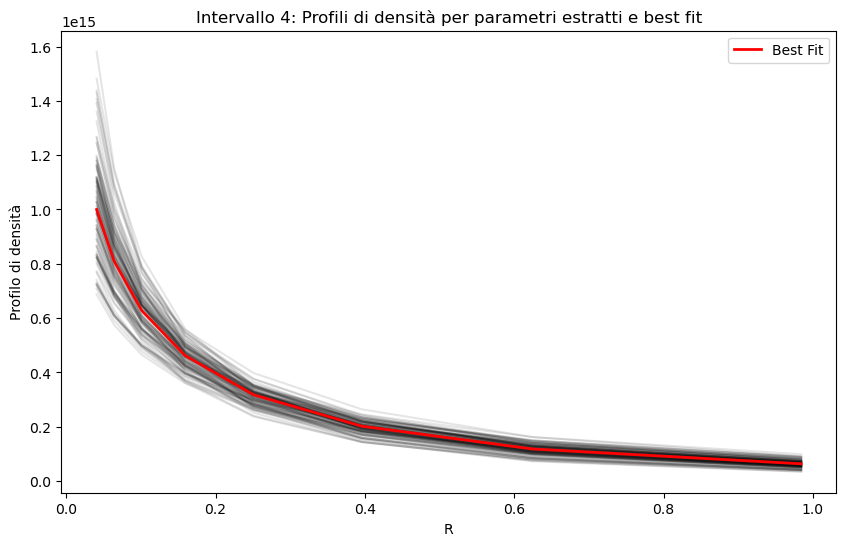

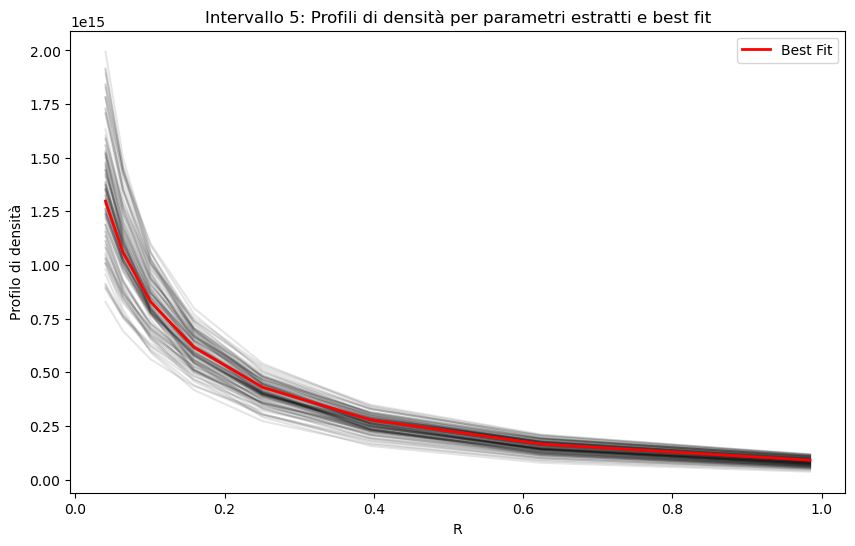

In [70]:
#seleziono a caso 100 valori dalla catena
num_campioni_da_catturare = 100

# Inizializza un array per memorizzare le coppie di parametri estratti
parametri_estratti = np.zeros((len(results), num_campioni_da_catturare, 2))

# Estrai casualmente 100 coppie di parametri da ciascun intervallo di ricchezza
for i in range(len(results)):
    # Estrai casualmente 100 indici unici dai campioni MCMC
    indici_campioni = np.random.choice(results[i].shape[0], num_campioni_da_catturare, replace=False)
    # Memorizza le coppie di parametri estratti
    parametri_estratti[i] = results[i][indici_campioni]

#print(parametri_estratti)

risultati_nfw_estratti = np.zeros((len(intervalli) - 1, num_campioni_da_catturare, len(R_values)))

# Calcola la funzione nfw per i parametri estratti
for i in range(len(intervalli) - 1):
    for j in range(num_campioni_da_catturare):
        # Ottieni i valori di M e c dalla matrice parametri_estratti
        logM, c = parametri_estratti[i, j]
        # Calcola il profilo di densità atteso con la funzione NFW
        profilo_densita = nfw(R_values, 10**logM, c, redshift_medi[i])
        # Memorizza il profilo di densità atteso
        risultati_nfw_estratti[i, j] = profilo_densita
    
#print(risultati_nfw_estratti.shape)  viene che è giustamente (5, 100, 8)

for i in range(len(intervalli) - 1):
    # Estrai i risultati della funzione nfw per i parametri estratti e i valori di best fit
    profili_estratti = risultati_nfw_estratti[i]
    profilo_best_fit = predictions_per_interval[i]
    
    # Crea un nuovo plot
    plt.figure(figsize=(10, 6))
    
    # Plot dei profili di densità per i parametri estratti
    for j in range(num_campioni_da_catturare):
        plt.plot(R_values, profili_estratti[j], color='k', alpha=0.1)  # Utilizza alpha per trasparenza
    
    # Plot del profilo di densità per i valori di best fit
    plt.plot(R_values, profilo_best_fit, color='red', label='Best Fit',linewidth=2)
    
    # Etichette degli assi e titolo
    plt.xlabel('R')
    plt.ylabel('Profilo di densità')
    plt.title(f'Intervallo {i+1}: Profili di densità per parametri estratti e best fit')
    
    # Aggiungi legenda
    plt.legend()
    
    # Mostra il plot
    plt.show()


La linea in rosso rappresenta il profilo di densità osservato, mentre le linee nere rappresentano il profilo di densità atteso calcolato con la NFW per i 100 valori estratti casualmente. Notiamo che all'aumentare di R e del gruppo di ricchezza i 100 valori sembrano convergere meglio verso la curva che descrive il profilo di densità osservato.